# PLASMA DIAGNOSTICS

## A catalogue of isoratios for plasma diagnostics

#### Consider the following ions: C$^{++}$, N$^{+}$, O$^{+}$, O$^{++}$, Ne$^{++}$, S$^{+}$, S$^{++}$, Cl$^{++}$, and Ar$^{3+}$.

### For each of them, find line pairs that are susceptible to be easily observed (either in the UV, the optical or the IR domain) and to give temperature and/or density diagnostics. Note: some line pairs are strictly equivalent from the point of view of the plasma diagnostics. e.g. [O III] $\lambda$ 4363/[O III ] $\lambda$ 5007 and [O III] $\lambda$ 4363/[O III] $\lambda$ 4959. In that case, consider only the one involving the strongest line, i.e., in this case [O III ] $\lambda$ 4363/[O III] $\lambda$ 5007.

##### We first import some useful libraries.

In [1]:
%matplotlib inline
import numpy as np
import pyneb as pn
import matplotlib.pyplot as plt

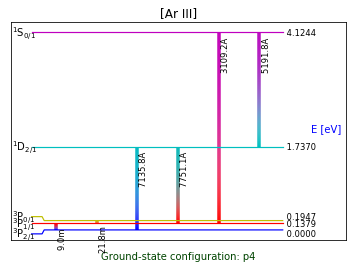

In [10]:
ar3 = pn.Atom('Ar', 3)
ar3.plotGrotrian()

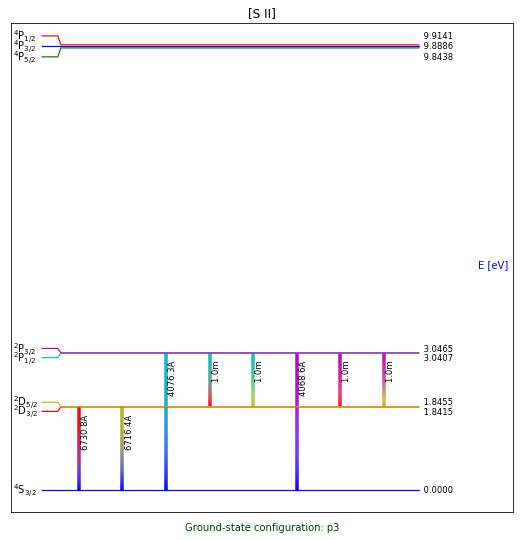

In [22]:
s2 = pn.Atom('S', 2)
f, ax = plt.subplots(figsize=(9,9))
s2.plotGrotrian(ax=ax)

##### We ask PyNeb for all the ratio diagnostics that it manages.

In [23]:
for d in np.sort(list(pn.diags_dict.keys())):
    print(d)

[ArIII] (7751+7136)/9m
[ArIII] 5192/7136
[ArIII] 5192/7300+
[ArIII] 7136/9m
[ArIII] 9.0m/21.8m
[ArIV] 2860+/4720+
[ArIV] 4740/4711
[ArIV] 7230+/4720+
[ArV] 4626/6600+
[CIII] 1909/1907
[ClIII] 5538/5518
[ClIV] 5323/7531
[ClIV] 5323/7700+
[FeIII] 4659/4009
[FeIII] 4659/4701
[FeIII] 4659/4734
[FeIII] 4701/4009
[FeIII] 4701/4734
[FeIII] 4734/4009
[FeIII] 4881/4009
[FeIII] 4881/4659
[FeIII] 4881/4701
[FeIII] 4881/4734
[FeIII] 4881/4931
[FeIII] 4881/5011
[FeIII] 4925/4009
[FeIII] 4925/4659
[FeIII] 4925/4701
[FeIII] 4925/4734
[FeIII] 4925/4881
[FeIII] 4925/4931
[FeIII] 4925/5011
[FeIII] 4931/4009
[FeIII] 4931/4659
[FeIII] 4931/4701
[FeIII] 4931/4734
[FeIII] 4987/4009
[FeIII] 4987/4659
[FeIII] 4987/4701
[FeIII] 4987/4734
[FeIII] 4987/4881
[FeIII] 4987/4925
[FeIII] 4987/4931
[FeIII] 4987/5011
[FeIII] 5011/4009
[FeIII] 5011/4659
[FeIII] 5011/4701
[FeIII] 5011/4734
[FeIII] 5011/4931
[FeIII] 5270/4009
[FeIII] 5270/4659
[FeIII] 5270/4701
[FeIII] 5270/4734
[FeIII] 5270/4881
[FeIII] 5270/4925
[FeIII]

In [24]:
print(pn.diags_dict['[OIII] 4363/5007+'])

('O3', 'L(4363)/(L(5007)+L(4959))', 'RMS([E(5007)*L(5007)/(L(5007)+L(4959)), E(4959)*L(4959)/(L(5007)+L(4959)), E(4363)])')


### For each of these pairs, construct an isoratio plot. Save the result.

warng EmisGrid: diag (L(3726)+L(3729))/(B("7319A+")+B("7330A+")) not found
warng EmisGrid: diag (B("1664A+"))/L(5007) not found
warng EmisGrid: diag B("1400A+")/L(259000) not found


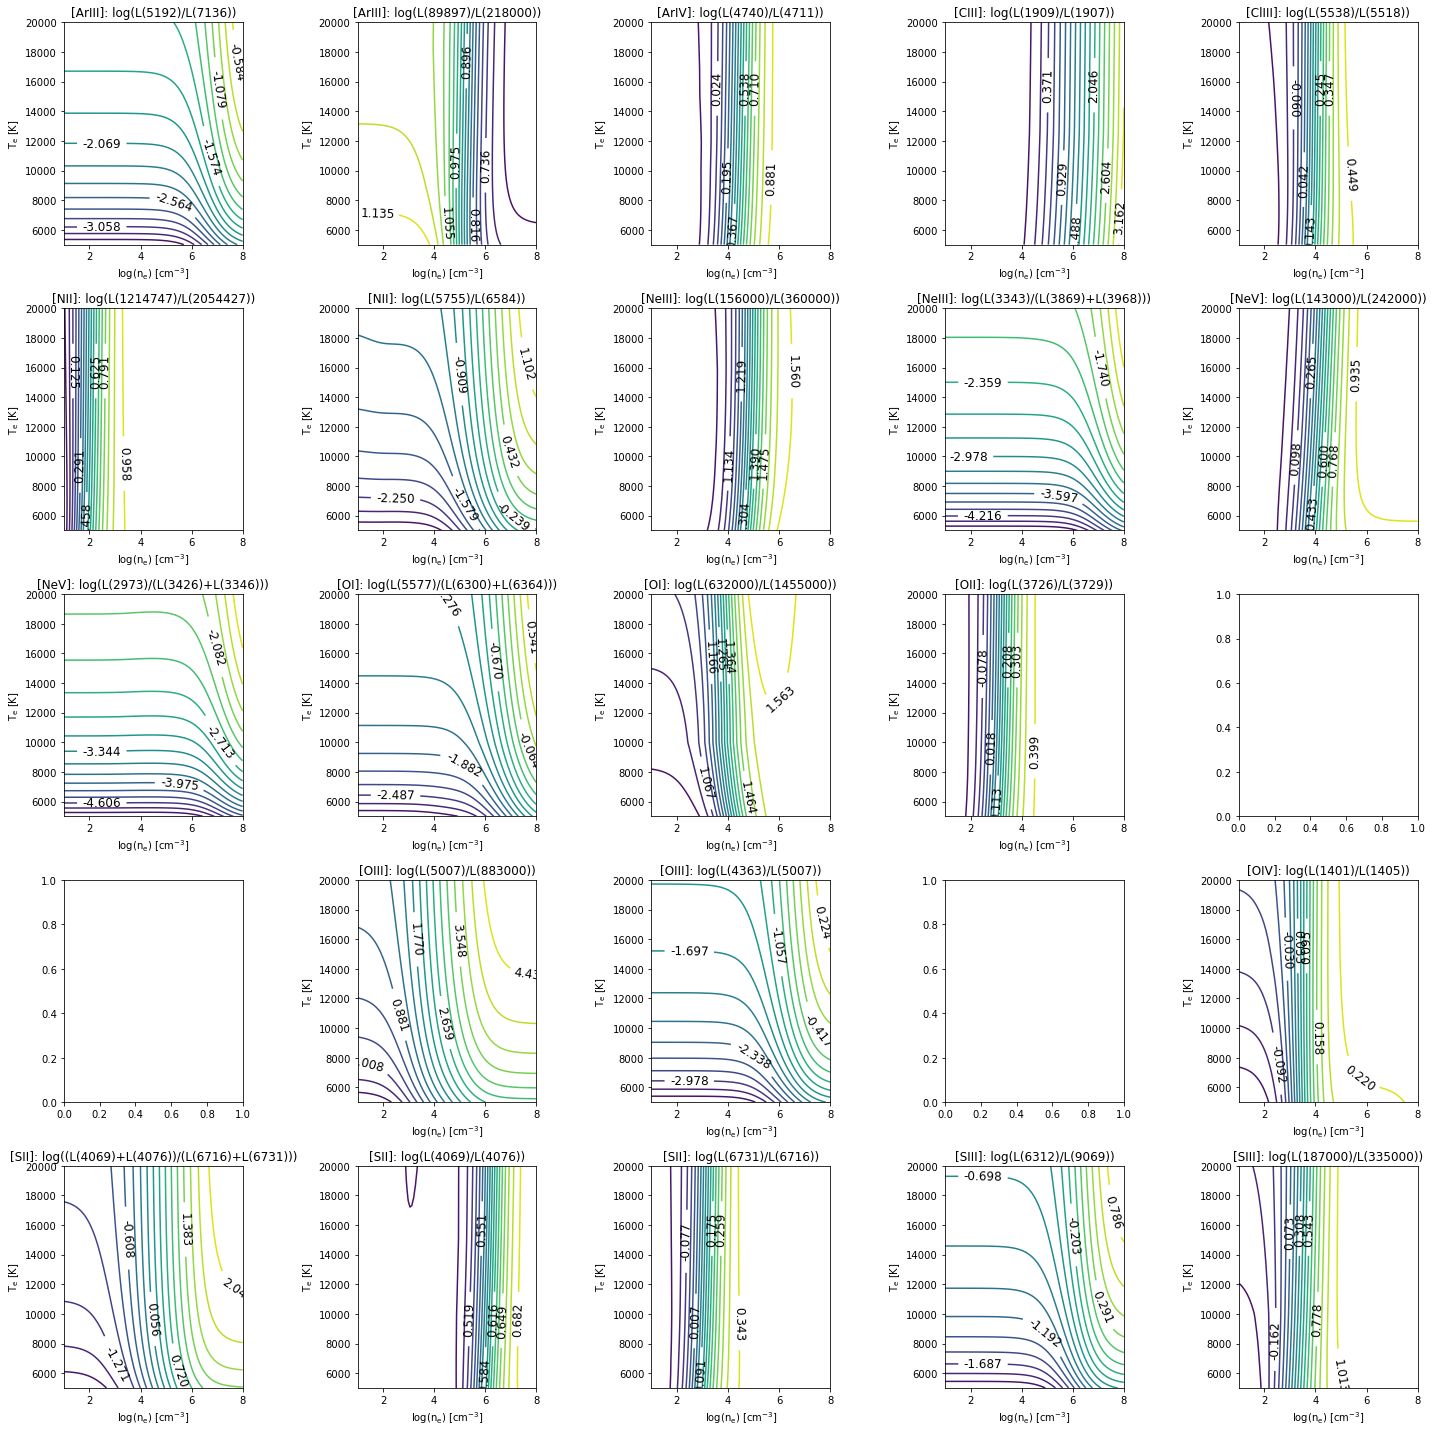

In [25]:
# Select a maximum of 25 diagnostics
diags = ['[ArIII] 5192/7136', 
         '[ArIII] 9.0m/21.8m',
         '[ArIV] 4740/4711',
         '[CIII] 1909/1907',
         '[ClIII] 5538/5518',
         '[NII] 121m/20.5m',
         '[NII] 5755/6584',
         '[NeIII] 15.6m/36.0m',
         '[NeIII] 3343/3930+',
         '[NeV] 14.3m/24.2m',
         '[NeV] 2973/3370+',
         '[OI] 5577/6300+',
         '[OI] 63m/147m',
         '[OII] 3726/3729',
         '[OII] 3727+/7325+',
         '[OIII] 1664+/5007',
         '[OIII] 5007/88m', 
         '[OIII] 4363/5007',
         '[OIV] 1400+/25.9m',
         '[OIV] 1401/1405',
         '[SII] 4072+/6720+',
         '[SII] 4069/4076', 
         '[SII] 6731/6716',
         '[SIII] 6312/9069',
         '[SIII] 18.7m/33.5m'
         ] 
# Build the 25 subplots
f, axes = plt.subplots(5, 5, figsize=(20,20))
# loop on the diagnostics
for i, d in enumerate(diags):
    # extract from the diagnostic dictionnary 
    # the expression to be evaluated
    to_eval = pn.diags_dict[d][1]
    atom = pn.diags_dict[d][0]
    # split e.g. obtain 'O', 3 from 'O3'
    elem, spec = pn.utils.misc.parseAtom(atom)
    # instantiate the EmisGrid object for the given ion 
    EG = pn.EmisGrid(elem, spec)
    # select the axis in which to plot
    ax = axes.ravel()[i]
    # make the plot
    EG.plotContours(to_eval = to_eval, ax=ax)
# Make the plot nicer
f.tight_layout()
# Save the result in a pdf file
f.savefig('Diagnostics.pdf')

### ??? Looking at these plots, for each of them find the temperature/density domain where they are useful for plasma diagnostics. [0III] 4363/5007; [NII] 5755/6584; [SIII] 18.7n/33.5n

##### We plot the Grotrian diagram to see where the lines are coming from.

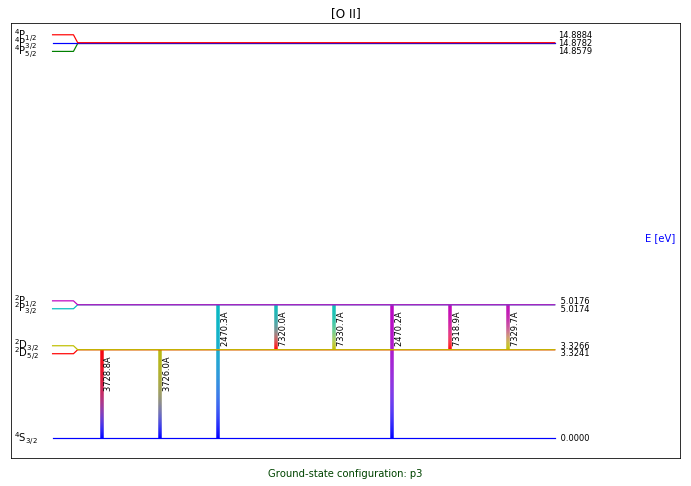

In [5]:
f, ax = plt.subplots(figsize=(12,8))
O2 = pn.Atom('O',2)
O2.plotGrotrian(ax=ax)

##### From the critical densities, we can have an idea of the density range.

In [6]:
print(O2.getCritDensity(tem=1e4))

[  0.00000000e+00   1.30322285e+03   4.05631759e+03   5.39592182e+06
   3.78619444e+06]


##### We can use a method in Atom to obtain the minimum and maximum densities between which the diagnostic as a meaning.

In [7]:
help(O2.getDensityRange)

Help on method getDensityRange in module pyneb.core.pynebcore:

getDensityRange(self, lev_i1=-1, lev_i2=-1, lev_j1=-1, lev_j2=-1, wave1=-1, wave2=-1, to_eval=None, tol=0.1, tem=10000.0) method of pyneb.core.pynebcore.Atom instance
    Return the range of density where a given line ratio is between 10% and 90% of the low and high density limits



In [8]:
print(O2.getDensityRange(to_eval='L(3726)/L(3729)'))

[   312.06079187  23239.70857753]


In [26]:
o2          = pn.RecAtom('O', 2)
temperature = np.logspace(2, 4.5, 100)
density     = np.logspace(2, 5, 100)
# to be continued with christophe's update

In [9]:
# the following is to have the nice style.
from IPython.core.display import HTML
def css_styling():
    styles = open("./styles/custom.css", "r").read()
    return HTML(styles)
css_styling()